In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import warnings
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("Copy of energy_production (1).csv")

In [3]:
df.shape

(9568, 5)

In [4]:
df.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [5]:
df.tail()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57
9567,17.75,49.25,1020.86,63.67,454.41


In [6]:
df.dtypes

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

In [7]:
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Data Preparation

In [8]:
df.isna().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [9]:
df.duplicated().sum()

41

In [10]:
df_clean=df.drop_duplicates()\
 .reset_index(drop=True)
df_clean.shape

(9527, 5)

In [11]:
df_clean.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

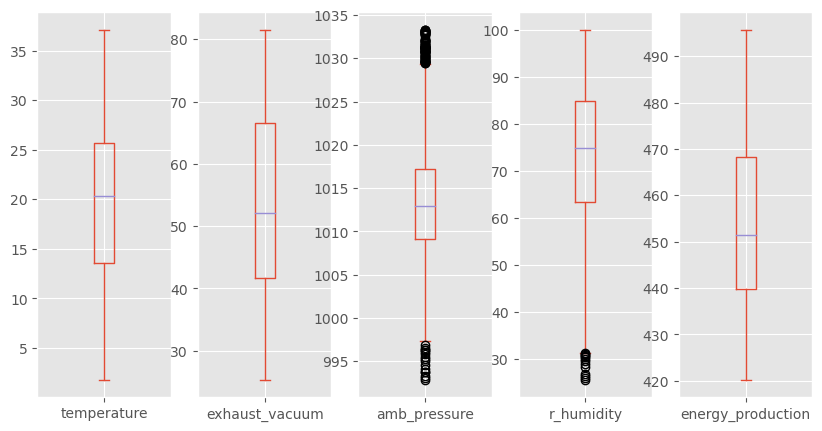

In [12]:
df_clean.plot(kind='box',subplots=True,figsize=(10,5))
plt.show()

In [13]:
df_clean.amb_pressure.mean()

1013.2370840768373

In [14]:
df_clean.amb_pressure.std()

5.940526064757301

In [15]:
df_clean.r_humidity.mean()

73.33495119135038

# Removing outliers using standard deviation

In [16]:
ap_upperlimit=df_clean.amb_pressure.mean()+ 2*df_clean.amb_pressure.std()
ap_upperlimit

1025.118136206352

In [17]:
ap_lowerlimit=df_clean.amb_pressure.mean()- 2.7*df_clean.amb_pressure.std()
ap_lowerlimit

997.1976637019926

In [18]:
rh_lowerlimit=df_clean.r_humidity.mean()- 2.6*df_clean.r_humidity.std()
rh_lowerlimit

35.35541673377896

In [19]:
df_clean.drop(df_clean.index[df_clean['amb_pressure']>ap_upperlimit], inplace=True)
df_clean.drop(df_clean.index[df_clean['amb_pressure']<ap_lowerlimit], inplace=True)
df_clean.drop(df_clean.index[df_clean['r_humidity']<rh_lowerlimit], inplace=True)

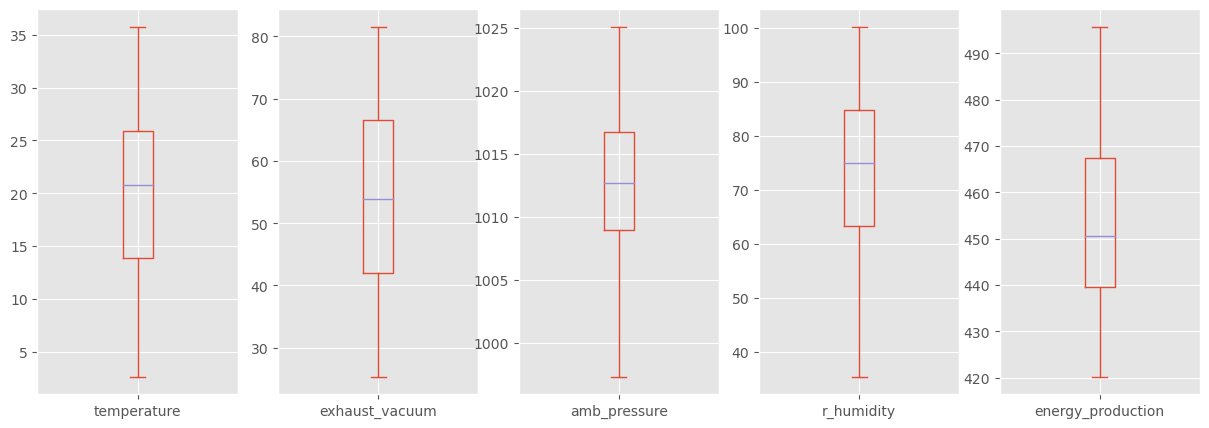

In [20]:
df_clean.plot(kind='box',subplots=True,figsize=(15,5))
plt.show()

In [21]:
df_clean.reset_index()

,index,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,0,9.59,38.56,1017.01,60.10,481.30
1,1,12.04,42.34,1019.72,94.67,465.36
2,2,13.87,45.08,1024.42,81.69,465.48
3,3,13.72,54.30,1017.89,79.08,467.05
4,4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...,...
9158,9522,17.10,49.69,1005.53,81.82,457.32
9159,9523,24.73,65.34,1015.42,52.80,446.92
9160,9524,30.44,56.24,1005.19,56.24,429.34
9161,9525,23.00,66.05,1020.61,80.29,421.57


In [22]:
df_clean.shape

(9163, 5)

# Outliers are removed

In [23]:
df_clean.skew()

temperature         -0.186363
exhaust_vacuum       0.150372
amb_pressure         0.001631
r_humidity          -0.373656
energy_production    0.360179
dtype: float64

# Visualization

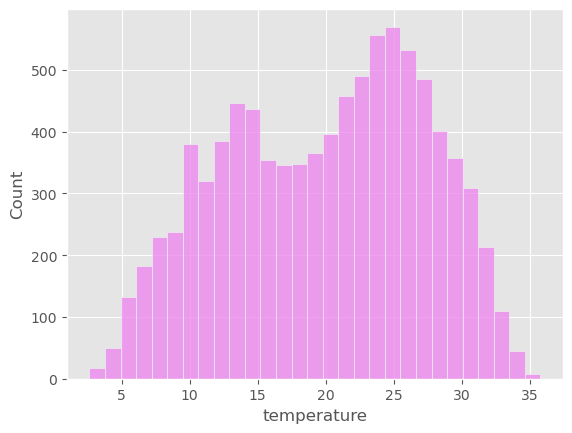

In [24]:
sns.histplot(df_clean['temperature'],color='violet')
plt.show()

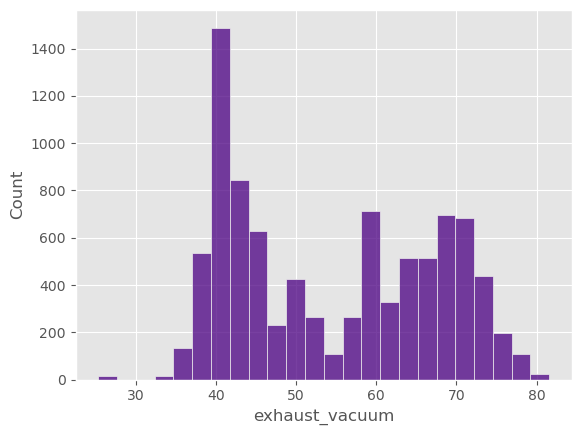

In [25]:
sns.histplot(df_clean['exhaust_vacuum'],color='indigo')
plt.show()

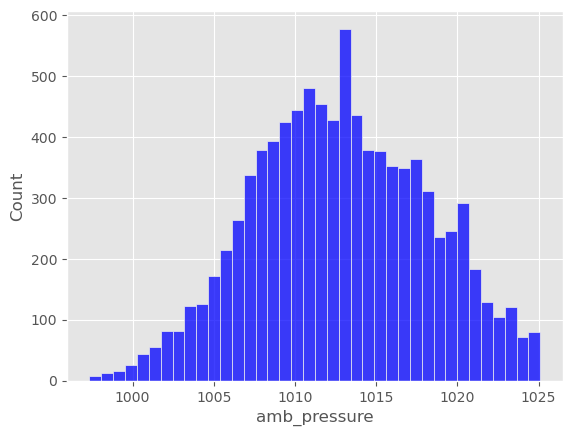

In [26]:
sns.histplot(df_clean['amb_pressure'],color='blue')
plt.show()

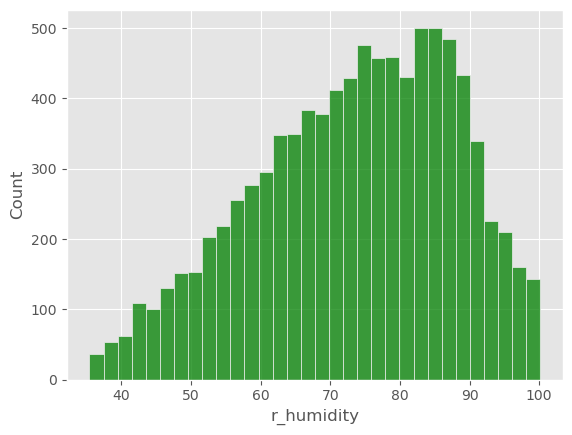

In [27]:
sns.histplot(df_clean['r_humidity'],color='green')
plt.show()

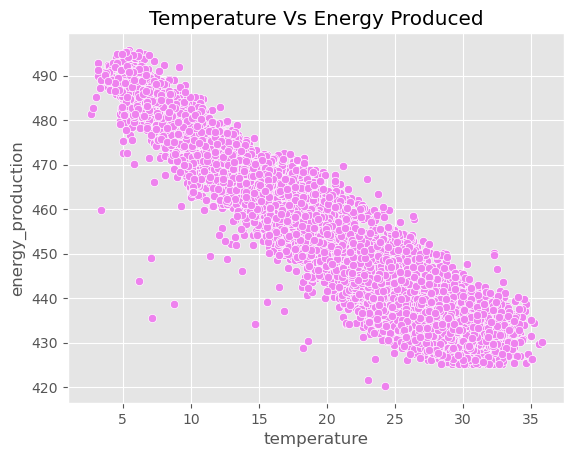

In [28]:
ax=sns.scatterplot(x='temperature',y='energy_production',data=df_clean,color='violet')
ax.set_title('Temperature Vs Energy Produced')
plt.show()

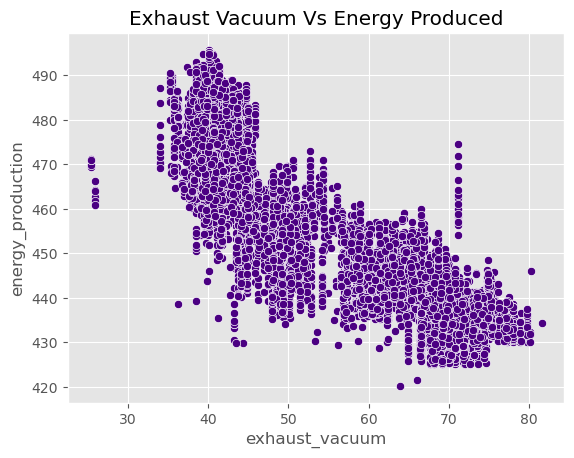

In [29]:
ax=sns.scatterplot(x='exhaust_vacuum',y='energy_production',data=df_clean,color='indigo')
ax.set_title('Exhaust Vacuum Vs Energy Produced')
plt.show()

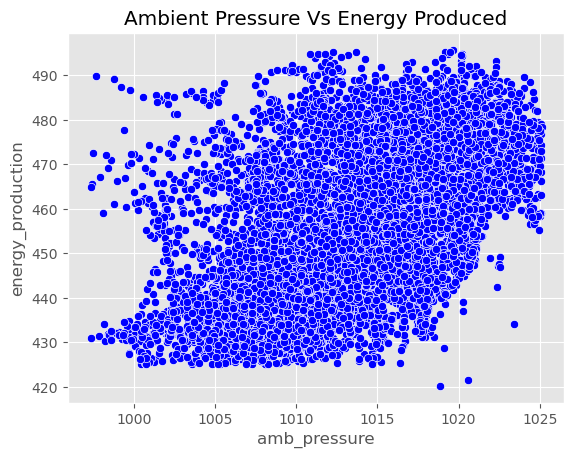

In [30]:
ax=sns.scatterplot(x='amb_pressure',y='energy_production',data=df_clean,color='blue')
ax.set_title('Ambient Pressure Vs Energy Produced')
plt.show()

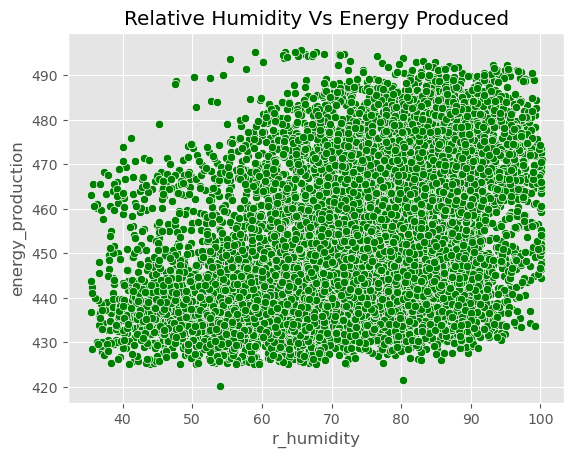

In [31]:
df_clean
ax=sns.scatterplot(x='r_humidity',y='energy_production',data=df_clean,color='green')
ax.set_title('Relative Humidity Vs Energy Produced')
plt.show()

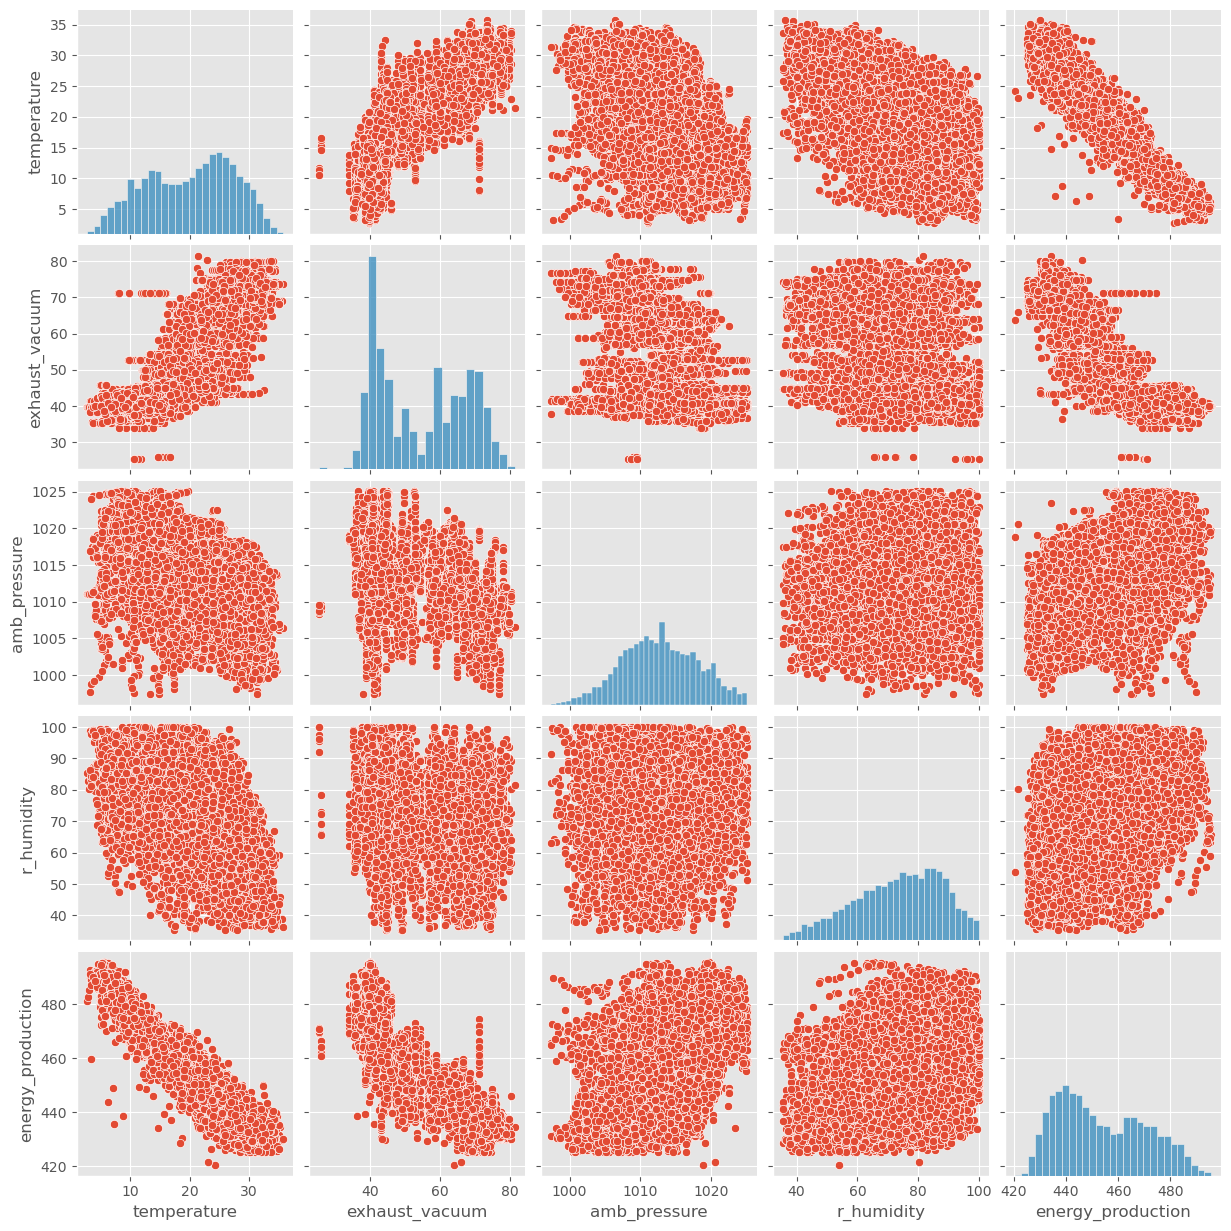

In [32]:
sns.pairplot(data=df_clean,vars=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity','energy_production'],)
plt.show()

In [33]:
co_relation = df_clean.corr()
co_relation

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.838498,-0.480848,-0.538271,-0.946001
exhaust_vacuum,0.838498,1.000000,-0.390710,-0.301195,-0.866357
amb_pressure,-0.480848,-0.390710,1.000000,0.088500,0.496018
r_humidity,-0.538271,-0.301195,0.088500,1.000000,0.380985
energy_production,-0.946001,-0.866357,0.496018,0.380985,1.000000


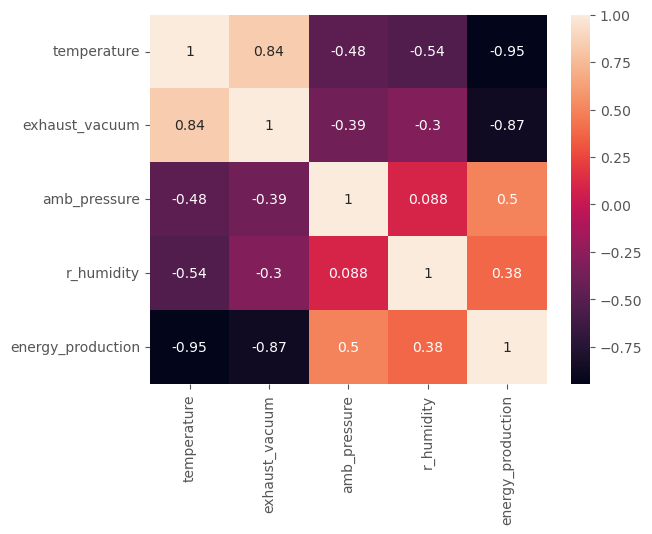

In [34]:
sns.heatmap(co_relation,annot=True)
plt.show()

# Normalisation

# Manual Method for normalising the data

In [35]:
#df_clean2=pd.DataFrame(df_clean)
#df_clean2

In [36]:
#df_clean2['temperature']=(df_clean2['temperature']-df_clean2['temperature'].mean())/df_clean2['temperature'].std()

In [37]:
#df_clean2['exhaust_vacuum']=(df_clean2['exhaust_vacuum']-df_clean2['exhaust_vacuum'].mean())/df_clean2['exhaust_vacuum'].std()

In [38]:
#df_clean2['amb_pressure']=(df_clean2['amb_pressure']-df_clean2['amb_pressure'].mean())/df_clean2['amb_pressure'].std()

In [39]:
#df_clean2['r_humidity']=(df_clean2['r_humidity']-df_clean2['r_humidity'].mean())/df_clean2['r_humidity'].std()

In [40]:
#df_clean2['energy_production']=(df_clean2['energy_production']-df_clean2['energy_production'].mean())/df_clean2['energy_production'].std()

In [41]:
#df_clean2

In [42]:
#sns.pairplot(data=df_clean2,vars=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity','energy_production'],)
#plt.show()

# Using MinMaxscaler for normalising the data

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df_clean)
df_norm = pd.DataFrame(df_norm, columns=df_clean.columns)
df_norm

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,0.209780,0.234875,0.708318,0.381408,0.808477
1,0.283731,0.302135,0.805906,0.915225,0.597351
2,0.338968,0.350890,0.975153,0.714793,0.598940
3,0.334440,0.514947,0.740007,0.674490,0.619735
4,0.377302,0.432028,0.952107,0.611489,0.573775
...,...,...,...,...,...
9158,0.436462,0.432918,0.294923,0.716800,0.490861
9159,0.666767,0.711388,0.651062,0.268684,0.353113
9160,0.839119,0.549466,0.282679,0.321804,0.120265
9161,0.614549,0.724021,0.837955,0.693175,0.017351


# Standardisation

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard = scaler.fit_transform(df_norm)
df_standard = pd.DataFrame(df_standard, columns=df_norm.columns)
df_standard.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,-1.410812,-1.275877,0.786298,-0.917710,1.640224
1,-1.076266,-0.976870,1.292356,1.478663,0.692021
2,-0.826380,-0.760129,2.170020,0.578897,0.699160
3,-0.846863,-0.030804,0.950627,0.397973,0.792552
4,-0.652963,-0.399421,2.050509,0.115150,0.586137


# Model Building

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Splitting Data into Train and Test

In [47]:
x = df_standard.drop('energy_production', axis=1)
y = df_standard['energy_production']

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
print('x_train Rows and columns : ',X_train.shape)
print('x_test Rows and columns : ',X_test.shape)
print('y_train Rows and columns : ',y_train.shape)
print('y_test Rows and columns : ',y_test.shape)

x_train Rows and columns :  (7330, 4)
x_test Rows and columns :  (1833, 4)
y_train Rows and columns :  (7330,)
y_test Rows and columns :  (1833,)


# Random Forest Regressor Model

In [50]:
# Initialize the model
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [51]:
# Fit the model
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
# Make predictions
predictions_rf = random_forest_model.predict(X_test)

In [53]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, predictions_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.037228731501079984


In [54]:
# Calculate the accuracy
accuracy_rf= random_forest_model.score(X_test, y_test)
print(f"Random Forest Model Accuracy: {accuracy_rf}")

Random Forest Model Accuracy: 0.9615389435941578


In [55]:
rmse_rf = np.sqrt(mse_rf)
print(rmse_rf)

0.19294748379048632


In [56]:
# Calculate MAE
mae_rf = mean_absolute_error(y_test, predictions_rf)
print(mae_rf)

0.1382422901539445


# Descision Tree Regressor Model

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
decision_tree_model = DecisionTreeRegressor(random_state=42)

In [59]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [60]:
predictions_dtr = decision_tree_model.predict(X_test)

In [61]:
# Evaluate the model
mse_dtr = mean_squared_error(y_test, predictions_dtr)
print(f"Decision Tree Mean Squared Error: {mse_dtr}")

Decision Tree Mean Squared Error: 0.06783378541925313


In [62]:
# Calculate the accuracy
accuracy_dtr = decision_tree_model.score(X_test, y_test)
print(f"Decision Tree Model Accuracy: {accuracy_dtr}")

Decision Tree Model Accuracy: 0.9299208180876105


In [63]:
rmse_dtr = np.sqrt(mse_dtr)
print(rmse_dtr)

0.2604491993062239


In [64]:
# Calculate MAE
mae_dtr = mean_absolute_error(y_test, predictions_dtr)
print(mae_dtr)

0.18030899546058032


# K Neighbors Model

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [66]:
kn_model = KNeighborsRegressor(n_neighbors=5)

In [67]:
kn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [68]:
predictions_kn = kn_model.predict(X_test)

In [69]:
# Evaluate the model
mse_kn = mean_squared_error(y_test, predictions_kn)
print(f"KN Mean Squared Error: {mse_kn}")

KN Mean Squared Error: 0.049566516756625614


In [70]:
# Calculate the accuracy
accuracy_kn = kn_model.score(X_test, y_test)
print(f"KN Model Accuracy: {accuracy_kn}")

KN Model Accuracy: 0.9487927597865536


In [71]:
rmse_kn = np.sqrt(mse_kn)
print(rmse_kn)

0.22263538972190744


In [72]:
# Calculate MAE
mae_kn = mean_absolute_error(y_test, predictions_kn)
print(mae_kn)

0.16304657519885446


# Gradient Boosting Model

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
gb_model = GradientBoostingRegressor(random_state=42)

In [75]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [76]:
predictions_gb = gb_model.predict(X_test)

In [77]:
# Evaluate the model
mse_gb = mean_squared_error(y_test, predictions_gb)
print(f"Gradient Boosting Mean Squared Error: {mse_gb}")

Gradient Boosting Mean Squared Error: 0.051905226154639855


In [78]:
# Calculate the accuracy
accuracy_gb = gb_model.score(X_test, y_test)
print(f" Gradient Boosting Model Accuracy: {accuracy_gb}")

 Gradient Boosting Model Accuracy: 0.9463766357219642


In [79]:
rmse_gb = np.sqrt(mse_gb)
print(rmse_gb)

0.22782718484553124


In [80]:
# Calculate MAE
mae_gb = mean_absolute_error(y_test, predictions_gb)
print(mae_gb)

0.1742744628429701


# Ridge Regression Model

In [81]:
from sklearn.linear_model import Ridge

In [82]:
ridge_model = Ridge(alpha=1.0)

In [83]:
ridge_model.fit(X_train, y_train)

Ridge()

In [84]:
predictions_ridge = ridge_model.predict(X_test)

In [85]:
# Evaluate the model
mse_ridge = mean_squared_error(y_test, predictions_ridge)
print(f"Ridge Mean Squared Error: {mse_ridge}")

Ridge Mean Squared Error: 0.06883309829397799


In [86]:
# Calculate the accuracy
accuracy_ridge = ridge_model.score(X_test, y_test)
print(f" Ridge Model Accuracy: {accuracy_ridge}")

 Ridge Model Accuracy: 0.9288884265101333


In [87]:
rmse_ridge = np.sqrt(mse_ridge)
print(rmse_ridge)

0.2623606264171093


In [88]:
# Calculate MAE
mae_ridge = mean_absolute_error(y_test, predictions_ridge)
print(mae_ridge)

0.2105066499565356


# Lasso Regression Model

In [89]:
from sklearn.linear_model import Lasso

In [90]:
lasso_model = Lasso(alpha=5)

In [91]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=5)

In [92]:
predictions_lasso = lasso_model.predict(X_test)

In [93]:
# Evaluate the model
mse_lasso= mean_squared_error(y_test, predictions_lasso)
print(f"Lasso Mean Squared Error: {mse_lasso}")

Lasso Mean Squared Error: 0.9681204049895265


In [94]:
# Calculate the accuracy
accuracy_lasso = lasso_model.score(X_test, y_test)
print(f" lasso Model Accuracy: {accuracy_lasso}")

 lasso Model Accuracy: -0.00016659183966005742


In [95]:
rmse_lasso = np.sqrt(mse_lasso)
print(rmse_lasso)

0.9839310976839417


In [96]:
# Calculate MAE
mae_lasso = mean_absolute_error(y_test, predictions_lasso)
print(mae_lasso)

0.8475637426148028


In [97]:
print('Model MSE')
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Decision Tree Mean Squared Error: {mse_dtr}")
print(f"KN Mean Squared Error: {mse_kn}")
print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
print(f"Ridge Mean Squared Error: {mse_ridge}")
print(f"Lasso Mean Squared Error: {mse_lasso}")
print('Model Accuracies')
print(f"Random Forest Model Accuracy: {accuracy_rf}")
print(f"Decision Tree Model Accuracy: {accuracy_dtr}")
print(f"KN Model Accuracy: {accuracy_kn}")
print(f"Gradient Boosting Model Accuracy: {accuracy_gb}")
print(f"Ridge Model Accuracy: {accuracy_ridge}")
print(f"lasso Model Accuracy: {accuracy_lasso}")

Model MSE
Random Forest Mean Squared Error: 0.037228731501079984
Decision Tree Mean Squared Error: 0.06783378541925313
KN Mean Squared Error: 0.049566516756625614
Gradient Boosting Mean Squared Error: 0.051905226154639855
Ridge Mean Squared Error: 0.06883309829397799
Lasso Mean Squared Error: 0.9681204049895265
Model Accuracies
Random Forest Model Accuracy: 0.9615389435941578
Decision Tree Model Accuracy: 0.9299208180876105
KN Model Accuracy: 0.9487927597865536
Gradient Boosting Model Accuracy: 0.9463766357219642
Ridge Model Accuracy: 0.9288884265101333
lasso Model Accuracy: -0.00016659183966005742


# Multi Linear Regression Model

# For building Multi Linear Resgression there are assumption regarding the data set.
They are as follows:-
Feature should be independent of each other there should'nt be any dependency upon each other
There shouldn't be any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)
Each Feature and Model Error (residuals) should be independent of each other
Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
There should be a linear relation between the dependent variable and Independent variables

In [98]:
import statsmodels.formula.api as sm
model = sm.ols("energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity", data = df_standard).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 2.888e+04
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:20:59   Log-Likelihood:                -1038.9
No. Observations:                9163   AIC:                             2088.
Df Residuals:                    9158   BIC:                             2123.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.817e-16      0.003   6.41e-14      1.000      -0.006       0.006
temperature       -0.8574      0.007   -126.997      0.000      -0.871      -0.844
exhaust_vacuum    -0.1784      0.006    -32.235      0.000      -0.189      -0.168
amb_pressure       0.0261      0.003      7.830      0.000       0.020       0.033
r_humidity        -0.1365      0.004    -37.152      0.000      -0.144      -0.129
==============================================================================
Omnibus:                      923.190   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4206.481
Skew:                          -0.401   Prob(JB):                         0.00
Kurtosis:                       6.221   Cond. No.                         4.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Testing
#### As Y = Beta0 + Beta1*(X1) + Beta2*(X2) +Beta3*(X3) + .................. + Beta n*(Xn)
#### Finding Coefficient Parameters (Beta0 and Beta1's values)

In [99]:
# Finding Coefficient parameters
model.params

Intercept         1.816581e-16
temperature      -8.573652e-01
exhaust_vacuum   -1.783689e-01
amb_pressure      2.614970e-02
r_humidity       -1.365483e-01
dtype: float64

Assupmtion for multi linear Regression fails

Feature should be independent of each other there should'nt be any dependency upon each other

In [100]:
# Finding tvalues and pvalues
display(model.tvalues, model.pvalues)

Intercept         6.414336e-14
temperature      -1.269965e+02
exhaust_vacuum   -3.223492e+01
amb_pressure      7.829803e+00
r_humidity       -3.715156e+01
dtype: float64

Intercept          1.000000e+00
temperature        0.000000e+00
exhaust_vacuum    4.884771e-216
amb_pressure       5.429807e-15
r_humidity        1.557884e-281
dtype: float64

# Let's build two model in each model one of the feature will not be present and then we will come to an conclusion to remove which of the feature by comparing the model parameters

In [101]:
temperature_present_model= sm.ols('energy_production~temperature+amb_pressure+r_humidity', data= df_standard).fit()
temperature_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 3.428e+04
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:21:00   Log-Likelihood:                -1531.3
No. Observations:                9163   AIC:                             3071.
Df Residuals:                    9159   BIC:                             3099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.817e-16      0.003   6.08e-14      1.000      -0.006       0.006
temperature     -1.0345      0.004   -249.900      0.000      -1.043      -1.026
amb_pressure     0.0143      0.004      4.074      0.000       0.007       0.021
r_humidity      -0.1771      0.004    -48.603      0.000      -0.184      -0.170
==============================================================================
Omnibus:                      819.673   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3349.399
Skew:                          -0.371   Prob(JB):                         0.00
Kurtosis:                       5.867   Cond. No.                         2.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


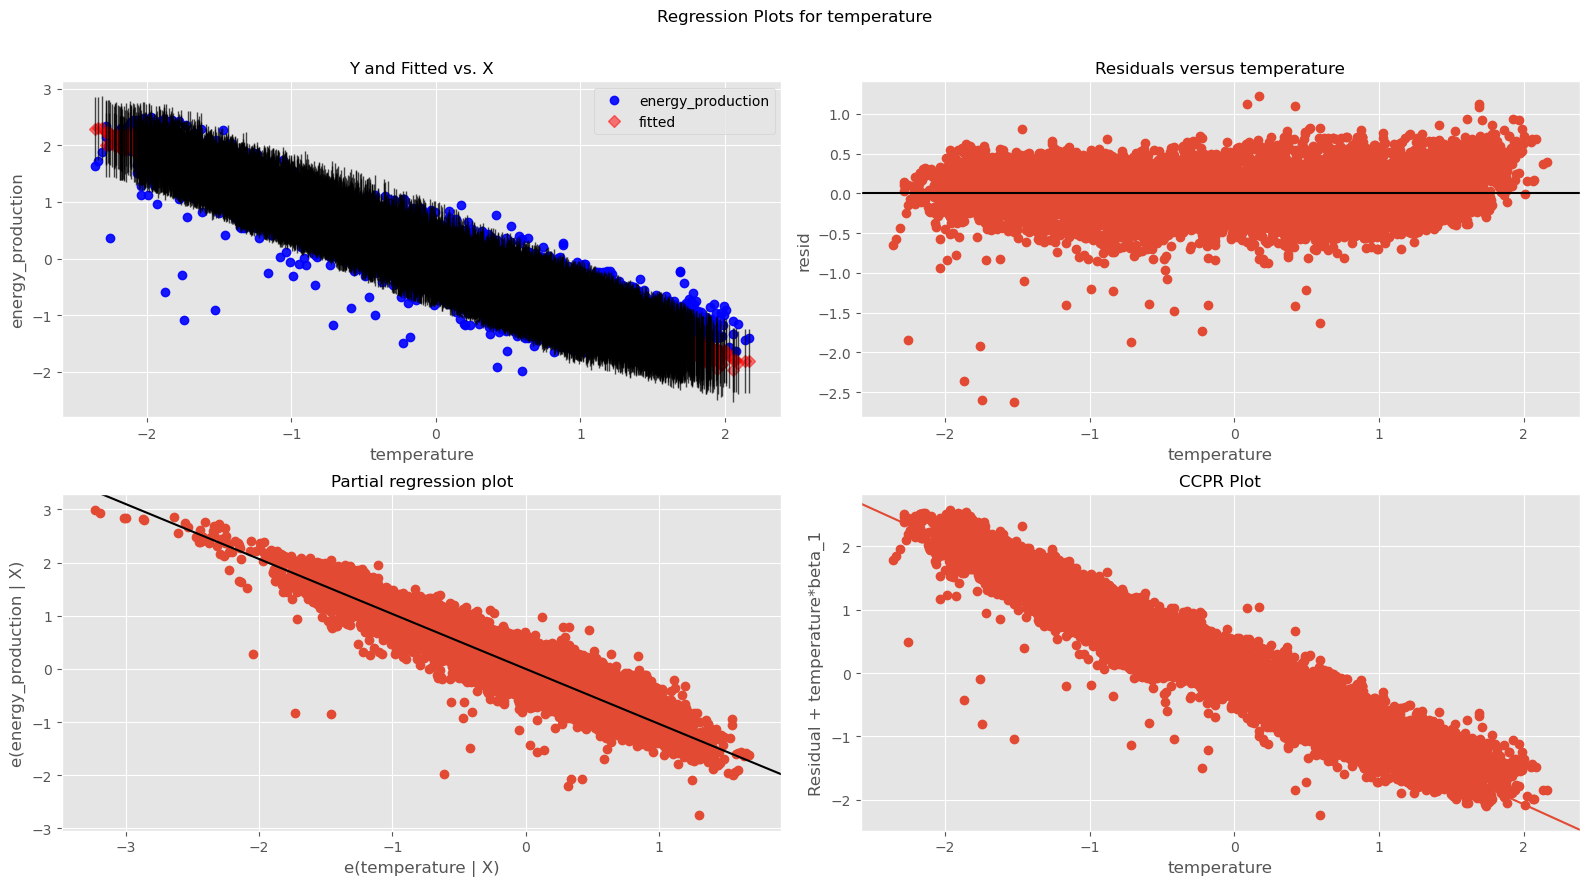

In [102]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(temperature_present_model, 'temperature', fig=fig)
plt.show()

In [103]:
vacuum_present_model= sm.ols('energy_production~exhaust_vacuum+amb_pressure+r_humidity', data= df_standard).fit()
vacuum_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 1.200e+04
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:21:01   Log-Likelihood:                -5692.0
No. Observations:                9163   AIC:                         1.139e+04
Df Residuals:                    9159   BIC:                         1.142e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.817e-16      0.005   3.86e-14      1.000      -0.009       0.009
exhaust_vacuum    -0.7503      0.005   -140.423      0.000      -0.761      -0.740
amb_pressure       0.1907      0.005     37.276      0.000       0.181       0.201
r_humidity         0.1381      0.005     27.977      0.000       0.128       0.148
==============================================================================
Omnibus:                      164.054   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.885
Skew:                           0.220   Prob(JB):                     3.28e-50
Kurtosis:                       3.635   Cond. No.                         1.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


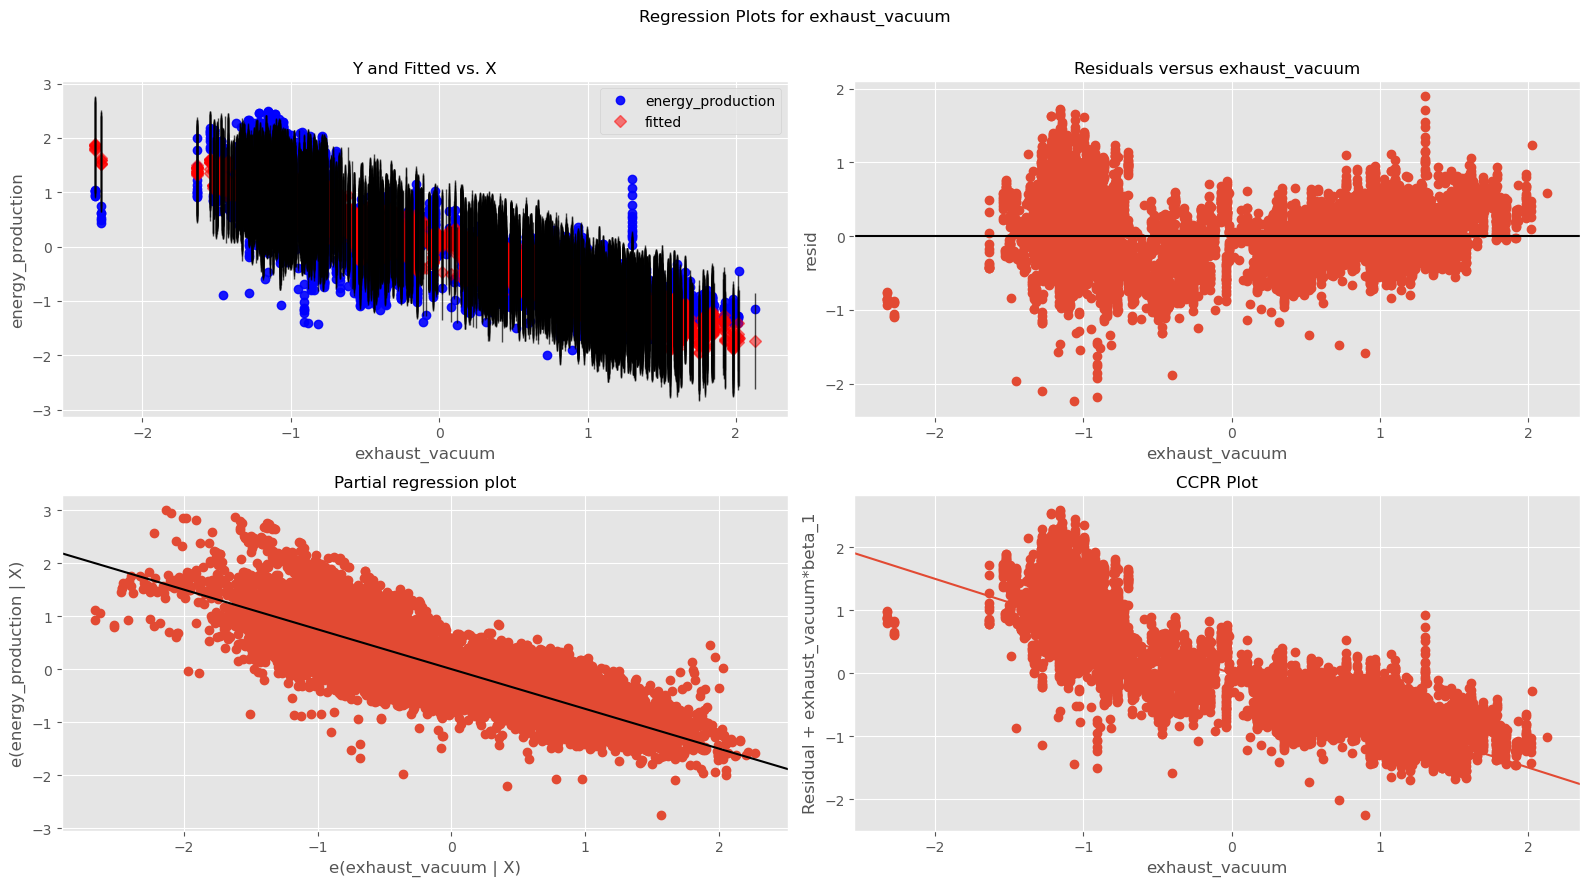

In [104]:
fig = plt.figure(figsize = (16,9))
smf.graphics.plot_regress_exog(vacuum_present_model, 'exhaust_vacuum', fig=fig)
plt.show()

In [105]:
df_standard.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [106]:
print('Temperature Model=', np.sqrt(temperature_present_model.mse_resid),'\n''Exhaust_vacuum Model=', np.sqrt(vacuum_present_model.mse_resid))

Temperature Model= 0.2860460372350299 
Exhaust_vacuum Model= 0.45044194706190754


# Let's compare the Root Mean Squared Error and check for the minimum value

In [107]:
rmse_compare = {'Temperature Model': np.sqrt(temperature_present_model.mse_resid),'Exhaust_vacuum': np.sqrt(vacuum_present_model.mse_resid)}
min(rmse_compare, key=rmse_compare.get)

'Temperature Model'

# ^Observation: The Model that was build without using Exhaust_vacuum feature performed very well.
+ Scoring minimumn Root mean squared error and maximum R-squared and adjusted R-squared
+ <b> Note: We are going to rebuild the model by dropping the exhaust_vacuum feature

In [108]:
final_model = sm.ols('energy_production~temperature+amb_pressure+r_humidity', data=df_standard).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 3.428e+04
Date:                Tue, 27 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:21:02   Log-Likelihood:                -1531.3
No. Observations:                9163   AIC:                             3071.
Df Residuals:                    9159   BIC:                             3099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.817e-16      0.003   6.08e-14      1.000      -0.006       0.006
temperature     -1.0345      0.004   -249.900      0.000      -1.043      -1.026
amb_pressure     0.0143      0.004      4.074      0.000       0.007       0.021
r_humidity      -0.1771      0.004    -48.603      0.000      -0.184      -0.170
==============================================================================
Omnibus:                      819.673   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3349.399
Skew:                          -0.371   Prob(JB):                         0.00
Kurtosis:                       5.867   Cond. No.                         2.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

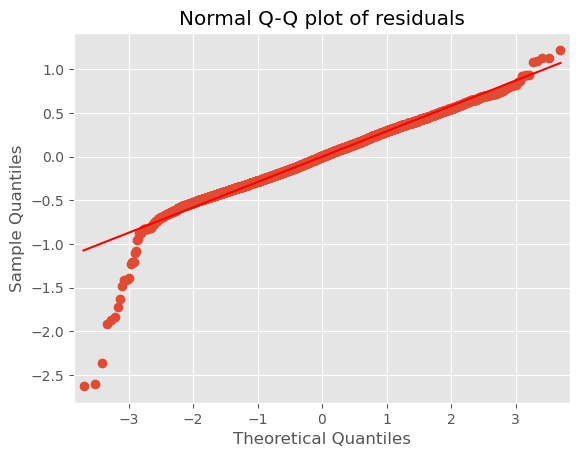

In [109]:
#Residuals values  = y - yhat
smf.qqplot(final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

# ^Observation: Error should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.

In [110]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

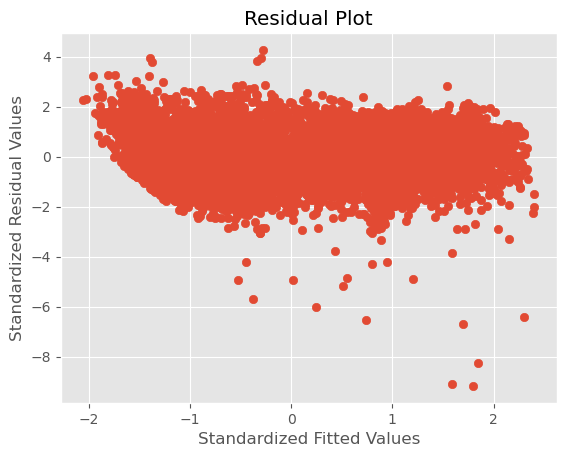

In [111]:
plt.scatter(get_standardized_values(final_model.fittedvalues), get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

#### ^Observation: Constant Variance (Homoscedasticity) in Error

#### Residual VS Regressors

+ Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors

eval_env: 1


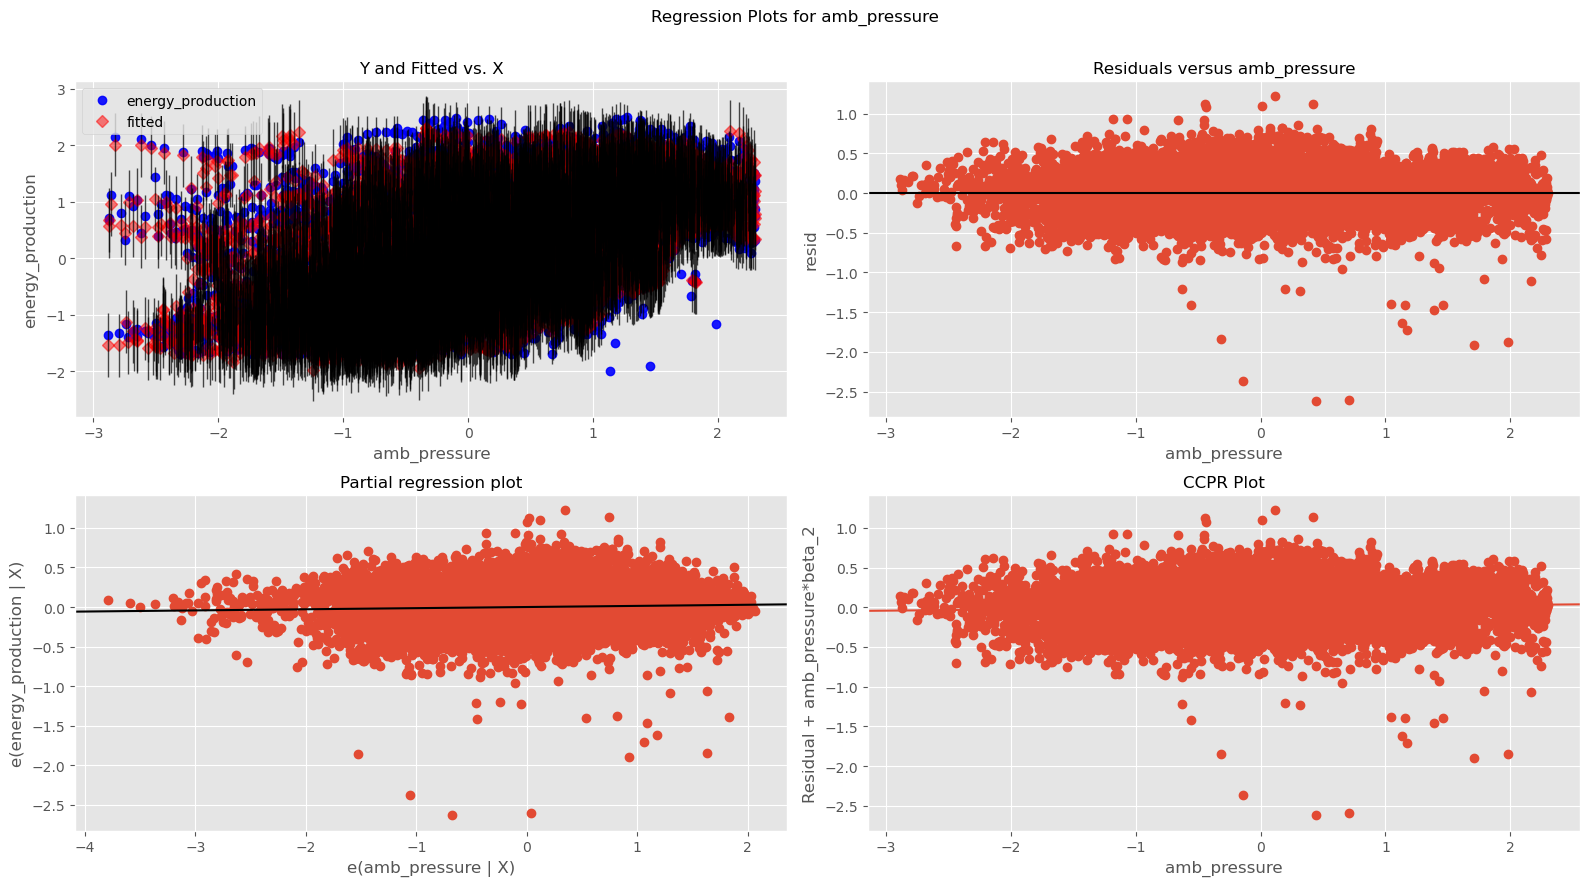

In [112]:
fig = plt.figure(figsize = (16,9))
plot_RnD = smf.graphics.plot_regress_exog(final_model, 'amb_pressure', fig=fig)
plt.show()

eval_env: 1


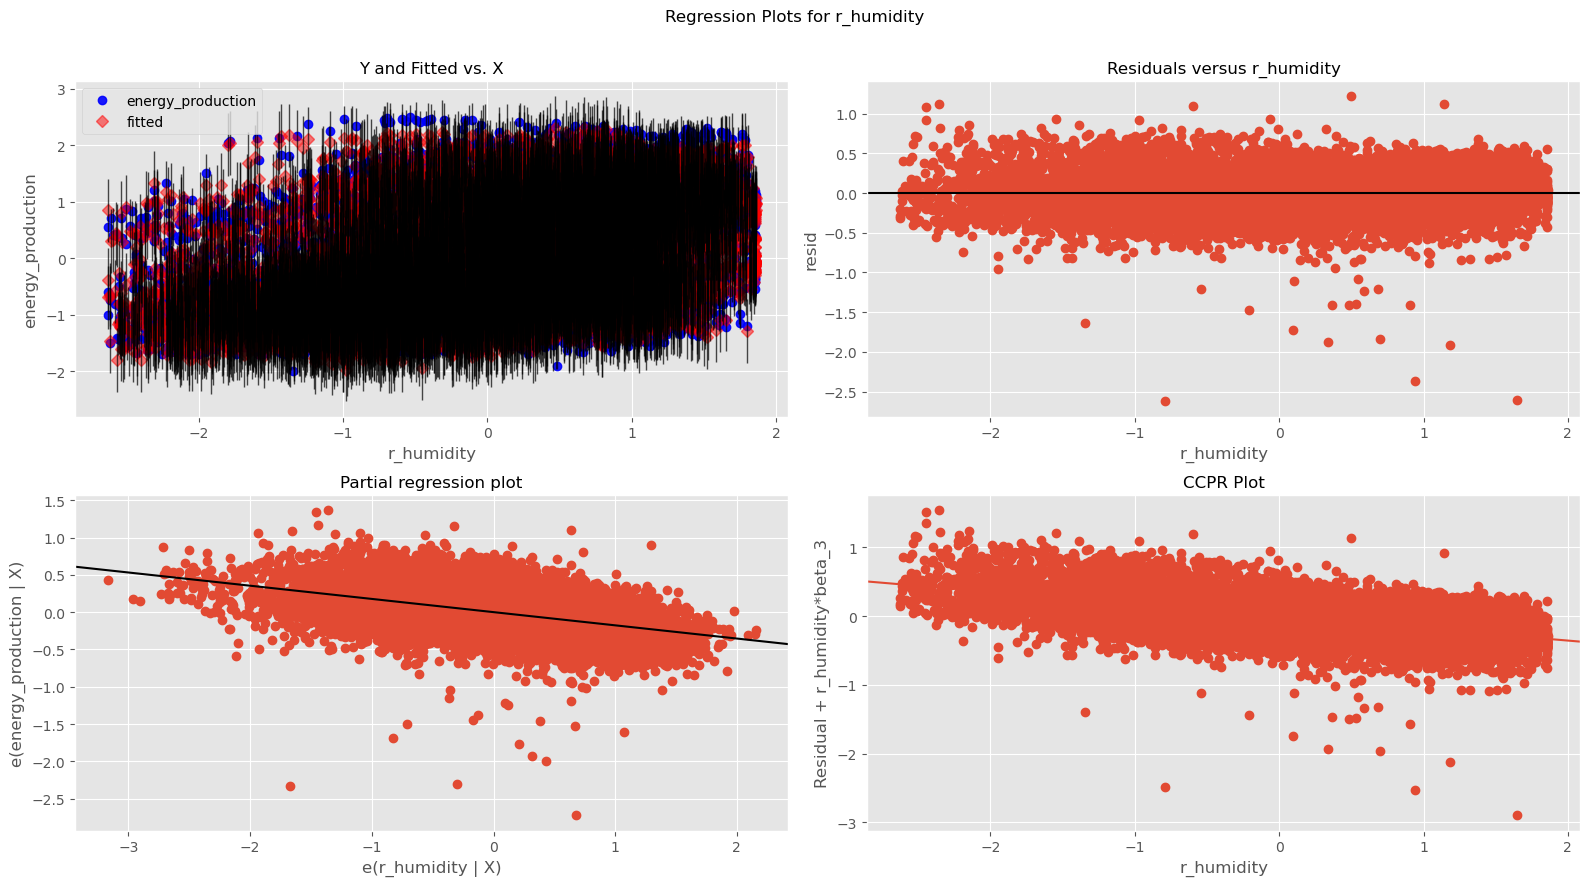

In [113]:
fig = plt.figure(figsize = (16,9))
plot_RnD = smf.graphics.plot_regress_exog(final_model, 'r_humidity', fig=fig)
plt.show()

### Predicting values from Model using same dataset

In [114]:
predicted = pd.DataFrame()
predicted['temperature'] = df_standard.temperature
predicted['exhaust_vacuum'] = df_standard.exhaust_vacuum
predicted['amb_pressure'] = df_standard.amb_pressure
predicted['r_humidity'] = df_standard.r_humidity
predicted['energy_production'] = df_standard.energy_production
predicted['Predicted_energy_production'] = pd.DataFrame(random_forest_model.predict(predicted[['temperature','exhaust_vacuum','amb_pressure','r_humidity']]))
predicted

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production,Predicted_energy_production
0,-1.410812,-1.275877,0.786298,-0.917710,1.640224,1.563969
1,-1.076266,-0.976870,1.292356,1.478663,0.692021,0.699570
2,-0.826380,-0.760129,2.170020,0.578897,0.699160,0.749169
3,-0.846863,-0.030804,0.950627,0.397973,0.792552,0.783731
4,-0.652963,-0.399421,2.050509,0.115150,0.586137,0.443829
...,...,...,...,...,...,...
9158,-0.385325,-0.395466,-1.357444,0.587908,0.213756,0.091870
9159,0.656547,0.842488,0.489386,-1.423742,-0.404896,-0.434775
9160,1.436245,0.122655,-1.420935,-1.185283,-1.450655,-1.307806
9161,0.420317,0.898651,1.458552,0.481850,-1.912860,-0.780840


In [115]:
import pickle

with open('rf__model.pkl','wb') as model_file:
    pickle.dump(random_forest_model,model_file)

In [116]:
import joblib
joblib.dump(random_forest_model,'rf__model.pkl.gz',compress=3)

['rf__model.pkl.gz']